In [1]:
!pip install lexical-diversity
!pip install textstat
# !pip install transformers==3.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.1 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/GPT



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/GPT


In [39]:
import pandas as pd

detectgptmodelname = 'detectgpt'
gptzeromodelname = 'gptzero'

def getInputfileName(datasetname):
    return f"./output/{datasetname}_Corpus.csv"

def getOutputfileName(datasetname, modelname):
    return f"./output/{datasetname}_result_{modelname}.csv"

from lexical_diversity import lex_div as ld
import textstat

def hist_readability_score(text_list, title="Title"):
  flesch_kincaid=[textstat.flesch_reading_ease(x) for x in text_list]
  coleman_liau=[textstat.coleman_liau_index(x) for x in text_list]
  gunning_fog=[textstat.gunning_fog(x) for x in text_list]
  automated_readability_index=[textstat.automated_readability_index(x) for x in text_list]
  # lexicon_count=[textstat.lexicon_count(x) for x in text_list]
  lexical_diversity = [ld.ttr(ld.flemmatize(x)) for x in text_list]

  fig, axarr = plt.subplots(1,5, figsize=(20,4))
  sns.histplot(flesch_kincaid, ax=axarr[0],stat="probability")
  sns.histplot(coleman_liau, ax=axarr[1],stat="probability")
  sns.histplot(gunning_fog, ax=axarr[2],stat="probability")
  sns.histplot(automated_readability_index, ax=axarr[3],stat="probability")
  sns.histplot(lexical_diversity, ax=axarr[4],stat="probability")

  axarr[0].set(xlabel = 'Score', ylabel='Probability', title= "flesch_reading_ease")
  axarr[1].set(xlabel = 'Score', ylabel=None, title= "coleman_liau_index")
  axarr[2].set(xlabel = 'Score', ylabel=None, title= "gunning_fog")
  axarr[3].set(xlabel = 'Score', ylabel=None, title= "automated_readability_index")
  axarr[4].set(xlabel = 'Score', ylabel=None, title= "lexical_diversity(TTR)")
  fig.suptitle( ": Complexity and Readability scores: "+title, y=1.05)

import nltk
nltk.download('punkt')

import seaborn as sns
import matplotlib.pyplot as plt
#_, axarr = plt.subplots(1,2, figsize=(12, 4))

def hist_plot(sentence_list , words_or_sentences ='words', x_lab="Sentence count", y_lab='Frequency', stat="probability", ax=axarr[0], x_start=None, x_end=None):
  from nltk import tokenize
  data=[len(tokenize.word_tokenize(x) if words_or_sentences== 'words' else tokenize.sent_tokenize(x)) for x in sentence_list]
  x_lab=x_lab+" - no of "+ words_or_sentences
  ax1 = sns.histplot(data, stat=stat, ax=ax)
  ax1.set(xlabel=x_lab, ylabel=y_lab)
  # import pdb
  # pdb.set_trace()
  if (x_start is not None and x_end is not None):
    ax1.set(xlim=(x_start , x_end))
    ax1.set_xticks(range(1,32))
  return ax1

def plot_EDA(datasetFile):

  print(f"Processing EDA for dataset : {datasetFile}" )

  input_text_file = getInputfileName(datasetFile)

  # ### Results from detectgpt and gptzero models , i.e. script# 1
  # result_detectgpt_file= getOutputfileName(datasetFile,detectgptmodelname)
  # result_gptzero_file=getOutputfileName(datasetFile,gptzeromodelname)

  ### df_combined is the combined gpt3.5  + human text
  df_combined = pd.read_csv(input_text_file, index_col=0)
  df_combined=df_combined.reset_index(drop=True)

  ### result from GPTZero : V1
  # gptzero = pd.read_csv(result_gptzero_file, index_col=0)

  ### result from DetectGPT: V1_1
  # detectgpt = pd.read_csv(result_detectgpt_file, index_col=0)
  # gptzero = gptzero.rename(columns={"label": "label_v1", "sr_no":"sr_no_v1", "desc": "desc_v1"})
  # detectgpt = detectgpt.rename(columns={"label": "label_v1_1", "sr_no":"sr_no_v1_1", "desc": "desc_v1_1"})

  fig, axarr = plt.subplots(1,2, figsize=(12, 4))
  axarr[0].set_title("ChatGPT")
  axarr[1].set_title("Human")

  hist_plot(df_combined.text[df_combined.source == "chatgpt"], words_or_sentences ='words', x_lab="Response length", y_lab='Probablity', stat="probability",ax=axarr[0]  )
  hist_plot(df_combined.text[df_combined.source == "human"], words_or_sentences ='words',x_lab="Response length", y_lab=None, stat="probability",ax=axarr[1]  )

  fig.suptitle('Response: Token Distribution', y=1.05)
  plt.tight_layout()
  plt.show()

  fig, axarr = plt.subplots(1,2, figsize=(12, 4))
  axarr[0].set_title("ChatGPT")
  axarr[1].set_title("Human")

  hist_plot(df_combined.text[df_combined.source == "chatgpt"], words_or_sentences ='sentence', x_lab="Response length", y_lab='Probablity', stat="probability",ax=axarr[0]  )
  hist_plot(df_combined.text[df_combined.source == "human"], words_or_sentences ='sentence', x_lab="Response length", y_lab=None, stat="probability",ax=axarr[1]  )

  fig.suptitle('Response: Token Distribution', y=1.05)
  plt.tight_layout()
  plt.show()

  hist_readability_score(df_combined['text'][df_combined.source=='human'], "Human")
  hist_readability_score(df_combined['text'][df_combined.source=='chatgpt'], "ChatGPT")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Processing EDA for dataset : DagPap22


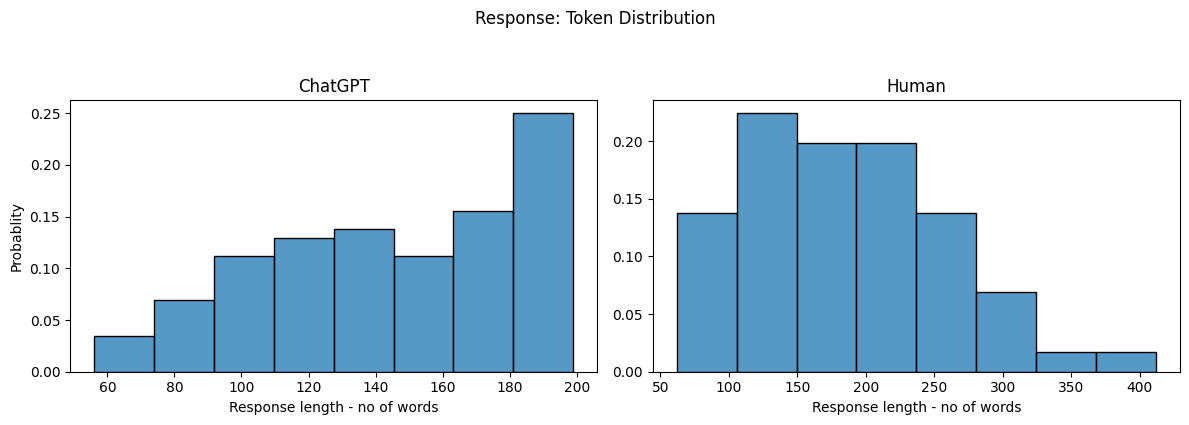

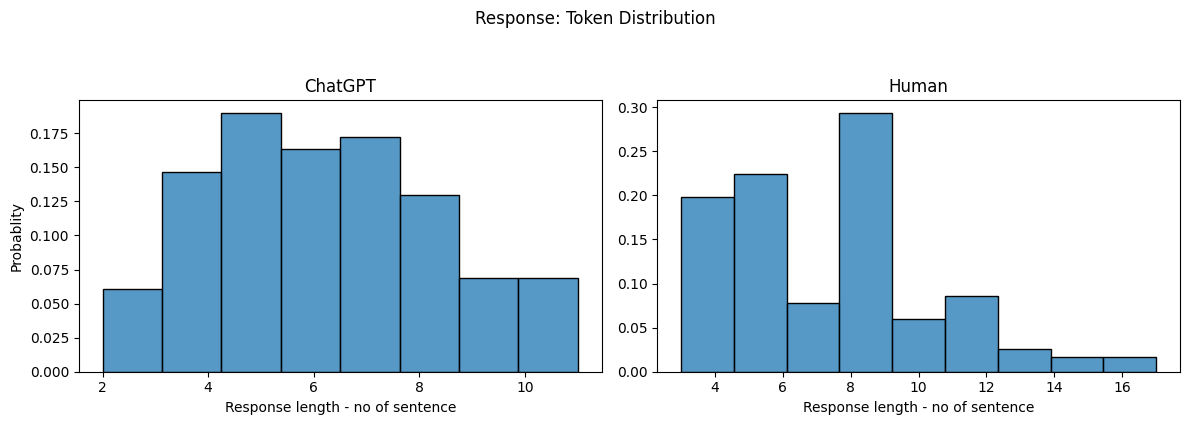

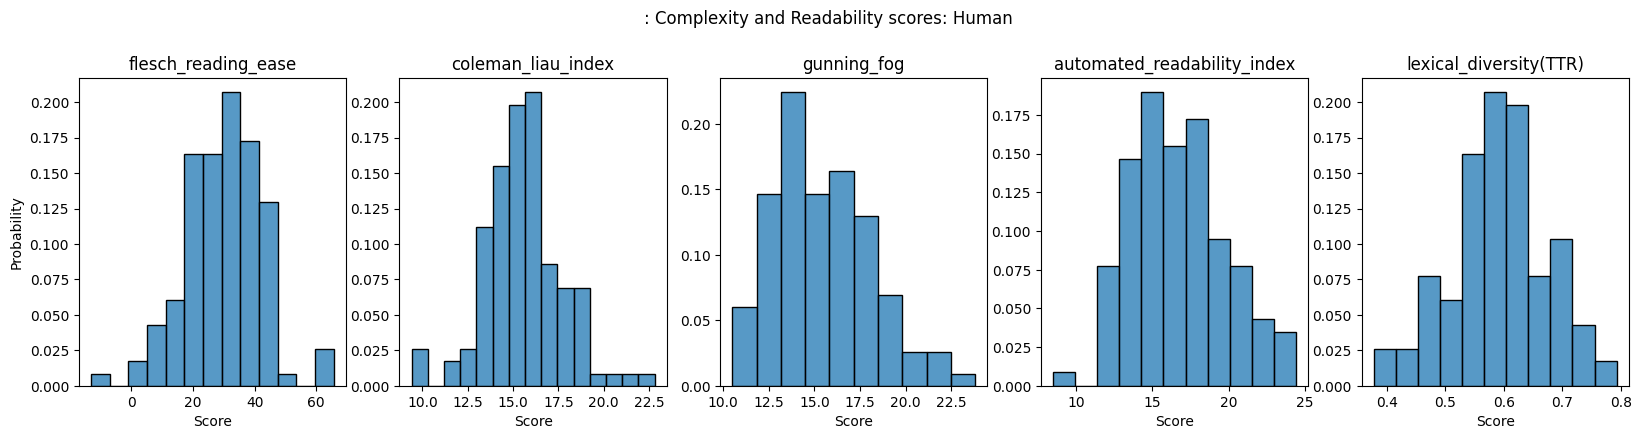

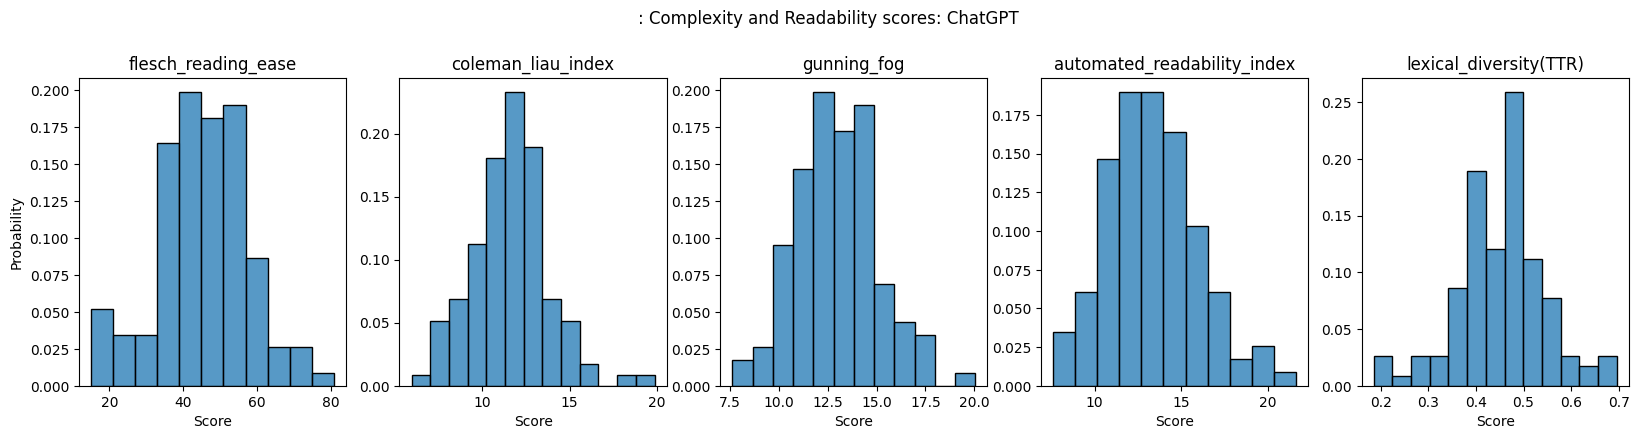

In [47]:
datasetname = [ 'DagPap22','chatgpt_human_combined','IELTS_GPT35_Human_Comparison']
#Plot EDA for DagPap22
plot_EDA(datasetname[0])

Processing EDA for dataset : chatgpt_human_combined


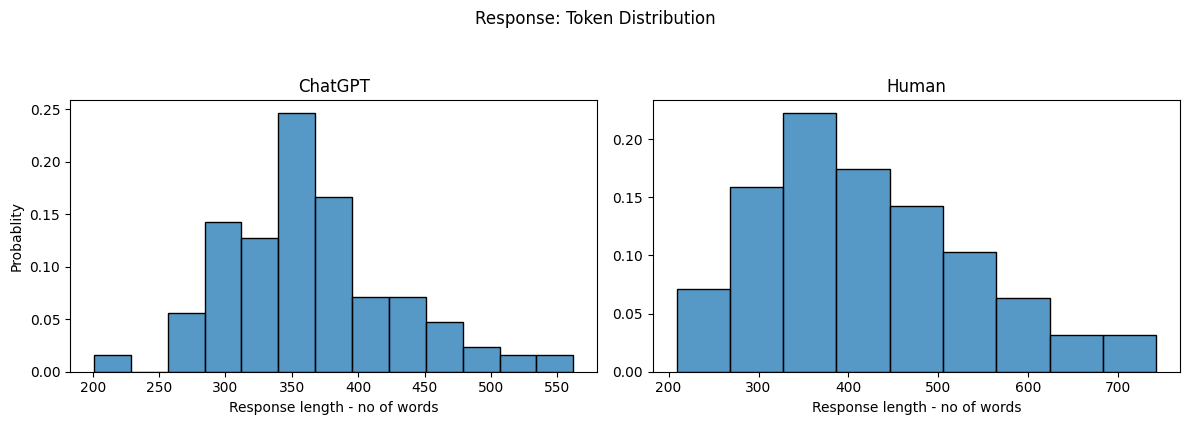

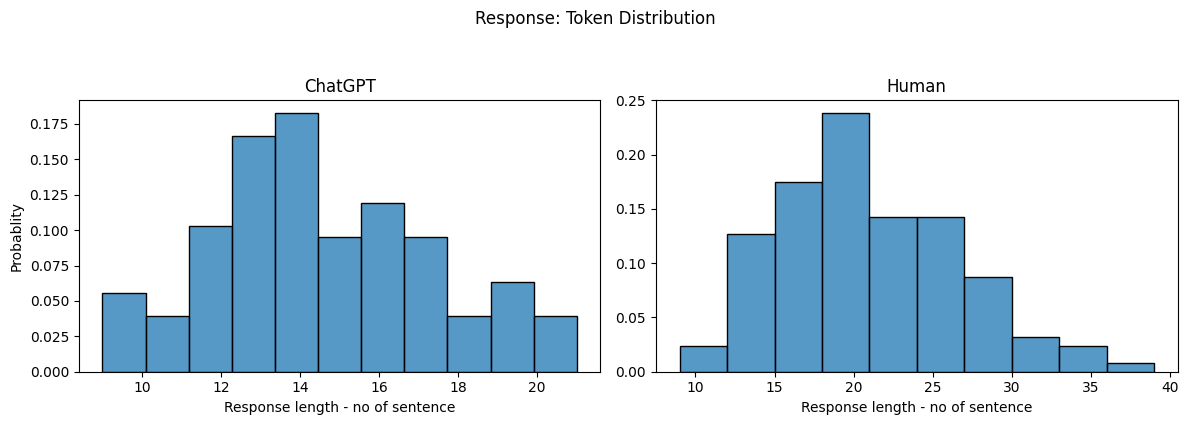

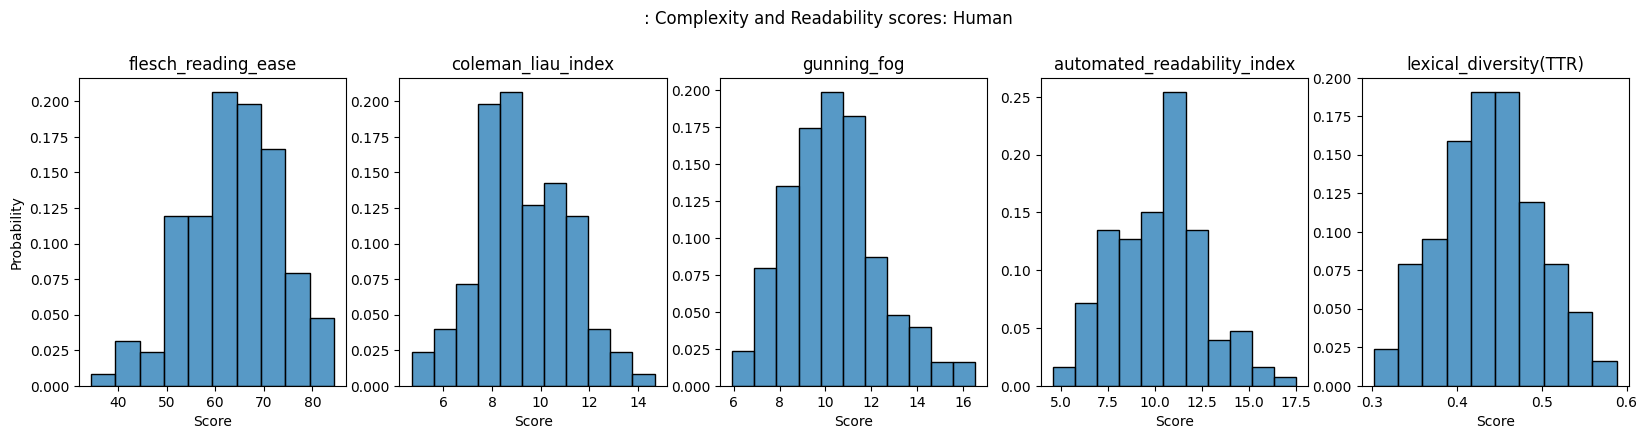

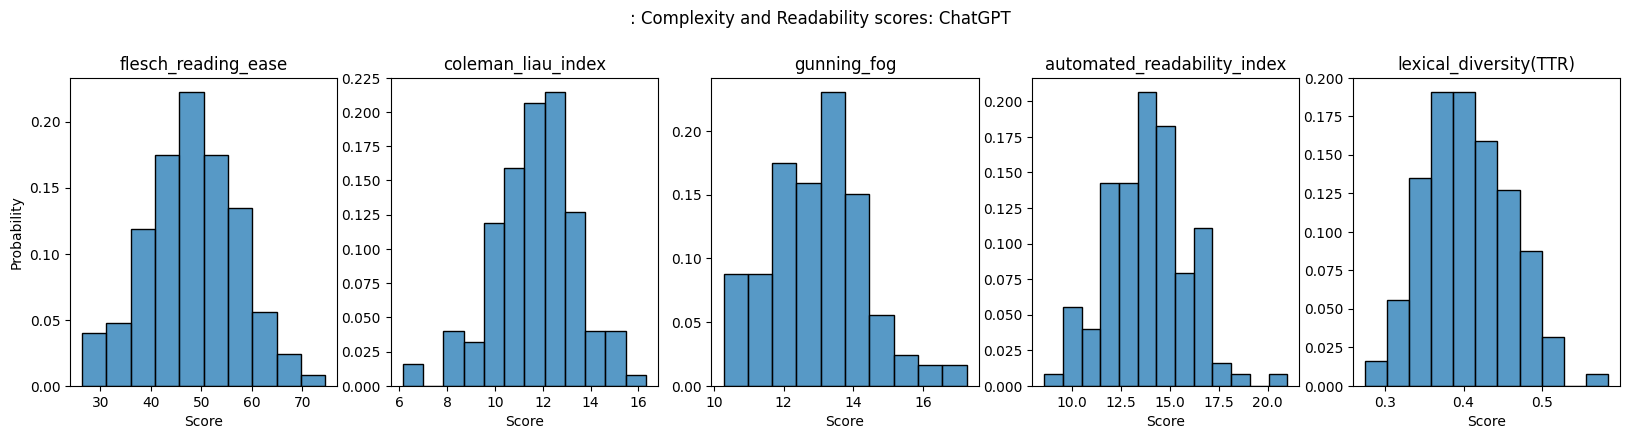

In [48]:
#Plot EDA for chatgpt_human_combined
plot_EDA(datasetname[1])

Processing EDA for dataset : IELTS_GPT35_Human_Comparison


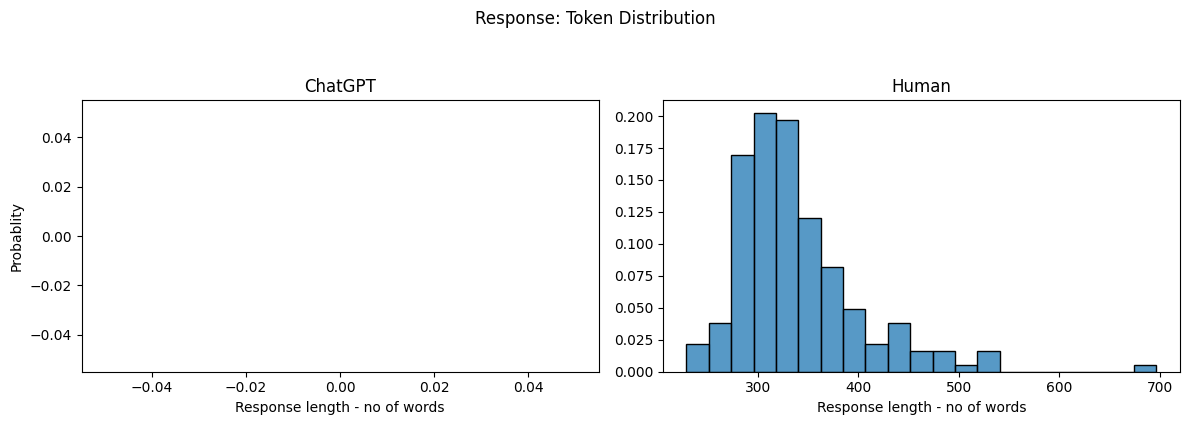

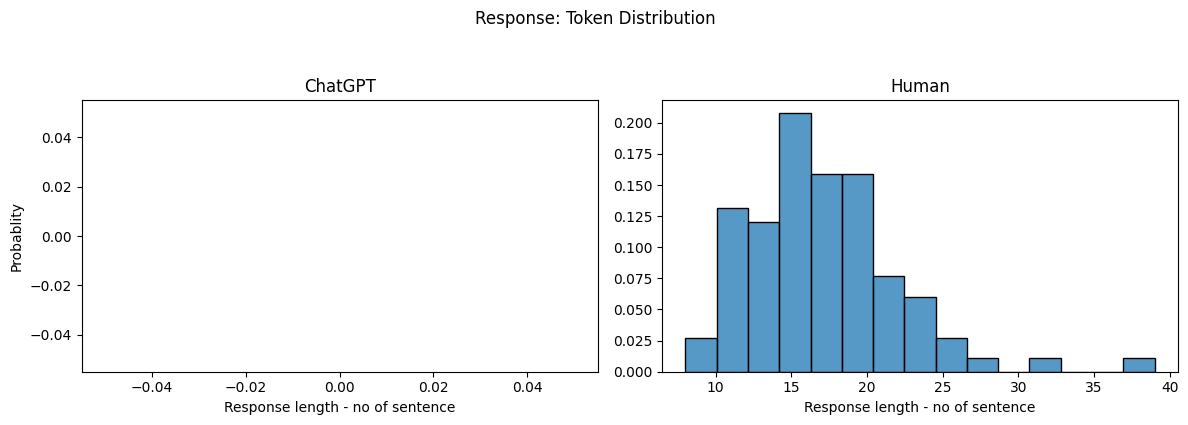

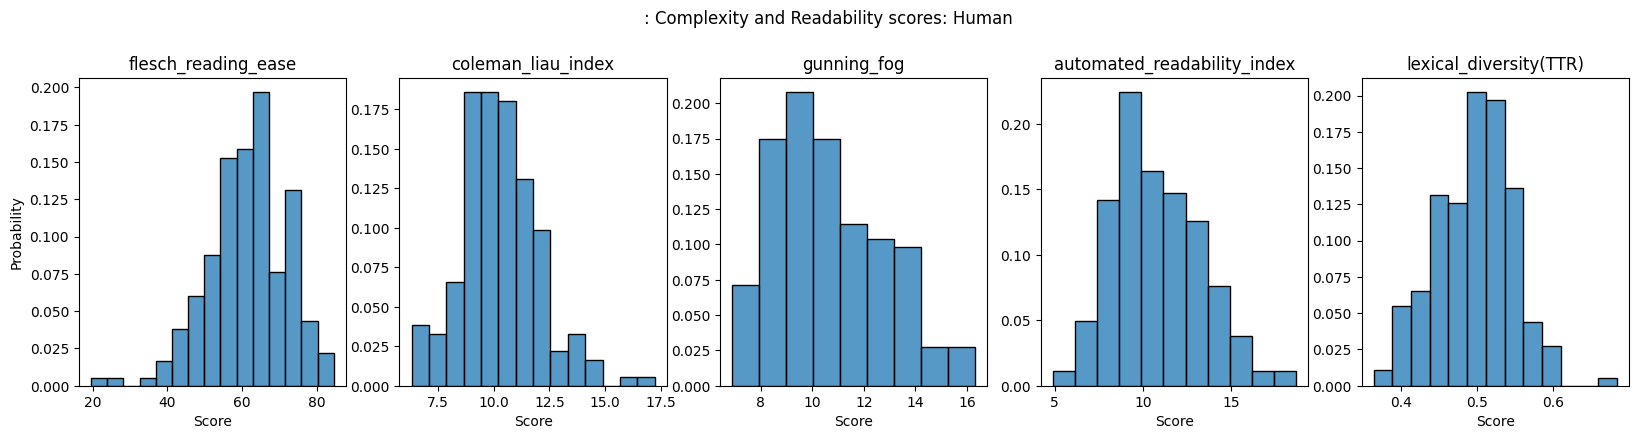

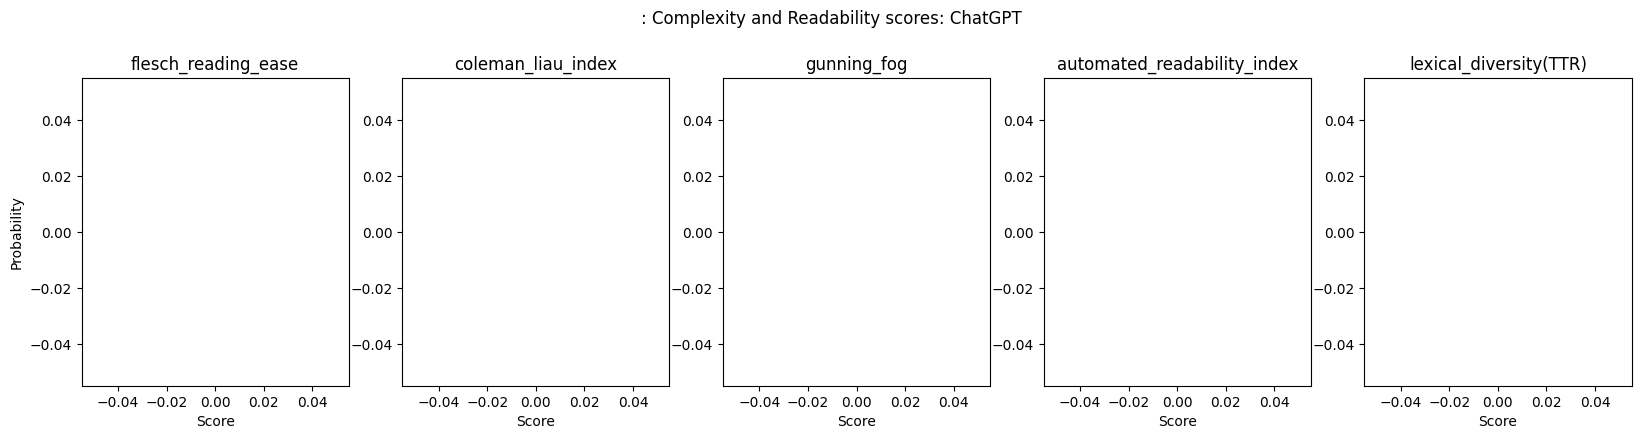

In [46]:
#Plot EDA for IELTS_GPT35_Human_Comparison
plot_EDA(datasetname[2])